# Usage of LidarProcessor

In [1]:
import os
import sys
from shapely.geometry import Polygon

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from lidar_processor import LidarProcessor

## Fetching data

In [2]:
MINX, MINY, MAXX, MAXY = [-93.759055, 41.925015, -93.766155, 41.935015]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))
lp = LidarProcessor(pipeline_json_path='../assets/get_data.json')
gdf_dict = lp.get_data(polygon, epsg=4326)

In [3]:
gdf_dict

{'unknown':         elevation                    geometry
 0          318.04  POINT (-93.76455 41.93406)
 1          317.74  POINT (-93.76454 41.93406)
 2          317.99  POINT (-93.76453 41.93406)
 3          317.93  POINT (-93.76452 41.93406)
 4          317.86  POINT (-93.76450 41.93405)
 ...           ...                         ...
 913969     307.97  POINT (-93.76172 41.93495)
 913970     309.45  POINT (-93.76250 41.93496)
 913971     311.15  POINT (-93.76328 41.93497)
 913972     307.90  POINT (-93.76490 41.93499)
 913973     327.76  POINT (-93.76568 41.93491)
 
 [913974 rows x 2 columns]}

## 3d render plot

In [4]:
gdf = gdf_dict['unknown']

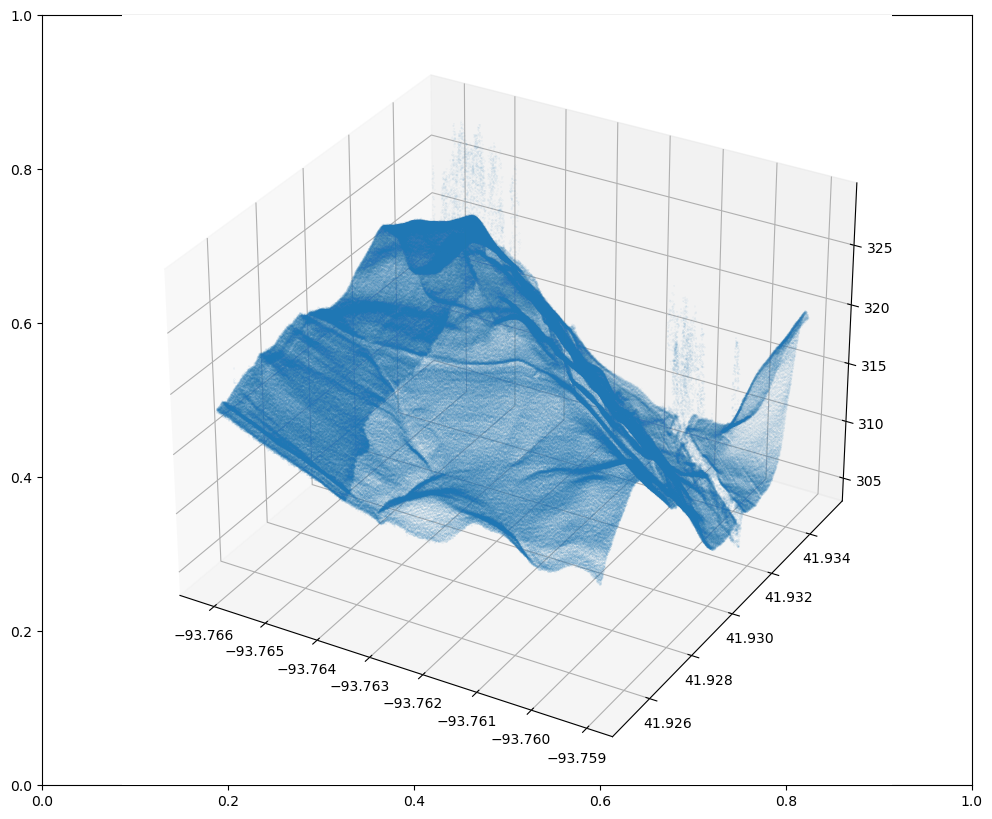

In [5]:
lp.plot_terrain_3d(gdf, size=0.002)

## Subsampling

In [6]:
# converting to a crs that uses meter
gdf['geometry'] = gdf['geometry'].to_crs(3857)
gdf = gdf.set_crs(epsg=3857)
gdf

,elevation,geometry
0,318.04,POINT (-10437822.430 5151107.560)
1,317.74,POINT (-10437821.160 5151107.090)
2,317.99,POINT (-10437820.130 5151106.790)
3,317.93,POINT (-10437818.970 5151106.400)
4,317.86,POINT (-10437816.720 5151105.640)
...,...,...
913969,307.97,POINT (-10437506.750 5151240.920)
913970,309.45,POINT (-10437594.160 5151242.070)
913971,311.15,POINT (-10437680.100 5151243.820)
913972,307.90,POINT (-10437861.460 5151245.930)


In [7]:
# actual subsampling
gdf1 = lp.subsample(gdf, 2)
gdf1

,elevation,geometry
0,318.186,POINT (-10437999.536 5149755.344)
1,318.190,POINT (-10437999.280 5149756.650)
2,318.176,POINT (-10437999.580 5149758.020)
3,318.146,POINT (-10437999.842 5149760.780)
4,318.218,POINT (-10437999.758 5149763.256)
...,...,...
315686,320.170,POINT (-10437210.460 5151218.970)
315687,320.170,POINT (-10437210.410 5151222.990)
315688,319.750,POINT (-10437210.300 5151237.330)
315689,319.710,POINT (-10437210.540 5151240.360)


In [9]:
# converting to the original crs
gdf1 = gdf1.set_crs(epsg=3857)
gdf1['geometry'] = gdf1['geometry'].to_crs(4326)
gdf1 = gdf1.set_crs(epsg=4326)
gdf1

,elevation,geometry
0,318.186,POINT (-93.76615 41.92503)
1,318.190,POINT (-93.76614 41.92503)
2,318.176,POINT (-93.76615 41.92504)
3,318.146,POINT (-93.76615 41.92506)
4,318.218,POINT (-93.76615 41.92508)
...,...,...
315686,320.170,POINT (-93.75906 41.93481)
315687,320.170,POINT (-93.75906 41.93483)
315688,319.750,POINT (-93.75906 41.93493)
315689,319.710,POINT (-93.75906 41.93495)


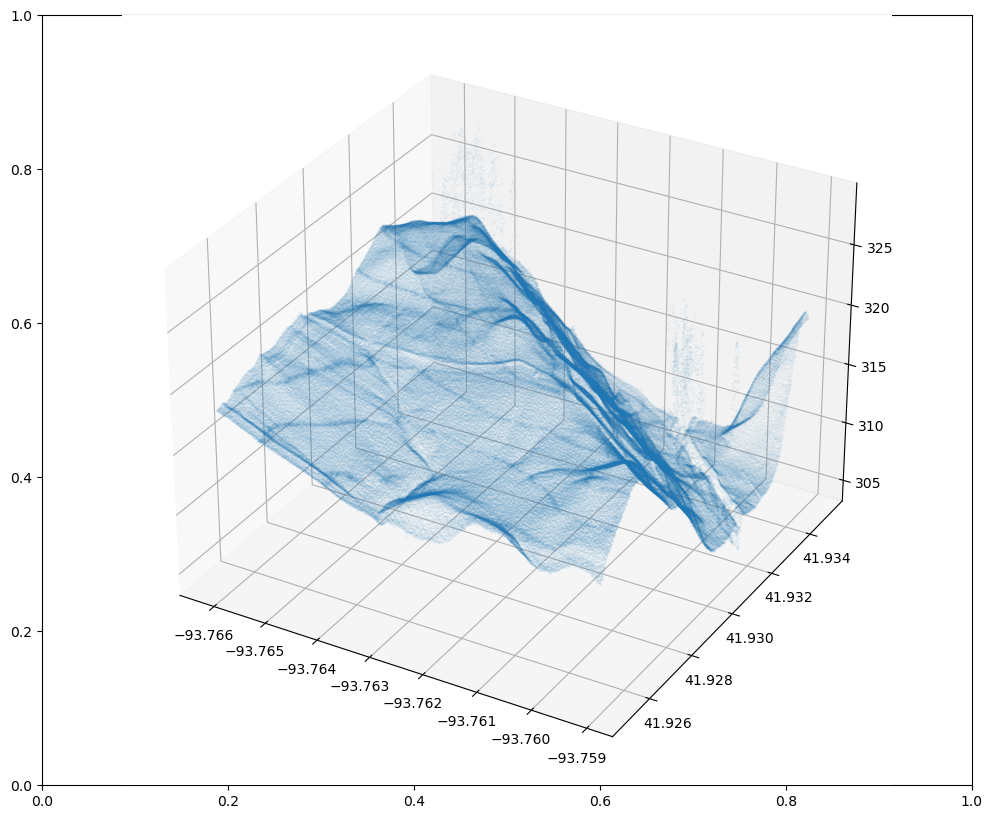

In [10]:
# plotting the subsampled point cloud data
lp.plot_terrain_3d(gdf1, size=0.002)